In [226]:
import torch 
import time
iters = 10
vlen = iters * (iters*10) * (iters*100) 
ts = time.time()
for i in range(iters):
    rng = torch.rand(vlen).cuda()
    print(torch.exp(rng).cuda().mean())
te = time.time()
print("%f seconds %d" % (iters, te - ts))
print("val %s" % rng)

1.7178353071212769
1.718799352645874
1.7188087701797485
1.7182599306106567
1.7187445163726807
1.7179861068725586
1.7181798219680786
1.71853506565094
1.7182165384292603
1.7173982858657837
10.000000 seconds 0
val 
 5.3708e-01
 5.5978e-01
 3.1702e-01
     ⋮     
 6.6218e-01
 9.2918e-01
 8.2928e-01
[torch.cuda.FloatTensor of size 1000000 (GPU 0)]



In [20]:
torch.__version__

'0.3.0'

In [23]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
rng=2
input1 = torch.rand(64*rng, 3*rng, 128*rng, 128*rng).cuda()
input2 = torch.rand(64*rng, 3*rng, 128*rng, 128*rng).cuda()
input1 = torch.autograd.Variable(input1, requires_grad=True)
input2 = torch.autograd.Variable(input2, requires_grad=True)
expected = torch.mul(input1, input2)
expected.mean()

Variable containing:
 0.2500
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [165]:
import pandas as pd
data = pd.read_csv("posw.csv")
data.head()

,Clone,RFP,DNASeq,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,...,Pos202,Pos203,Pos204,Pos205,Pos206,Pos207,Pos208,Pos209,Pos210,Pos211
0,E6,2246,TCTCCTCATTTCTATTGAGTCATCCTAGCATTAGAGTTATTTGTCA...,T,C,T,C,C,T,C,...,G,A,G,T,T,G,C,A,T,A
1,F4,3878,CTTAGCGTGTTCGCGTGTCGAGTAGTGTAATGATAAATATTTTTAA...,C,T,T,A,G,C,G,...,G,A,G,G,T,G,G,T,T,T
2,A4,4854,ATTTCTGCGATCCGGTTAGGAAATAACTTTCCTGAATGTGAAGGTG...,A,T,T,T,C,T,G,...,G,A,G,C,G,T,C,G,T,A
3,G2,5191,TTGACCCTATCTTGGTCTATTAAAGTGCAGGCACGTACATGTTTCT...,T,T,G,A,C,C,C,...,G,A,G,G,C,G,A,T,C,T
4,D5,5203,GTGTCCTTTAACCAGATCGGCGTCATGTGCGTGTGAACGGAGTTCT...,G,T,G,T,C,C,T,...,G,A,G,A,G,C,G,T,C,G


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc460eb208>,
      dtype=object)

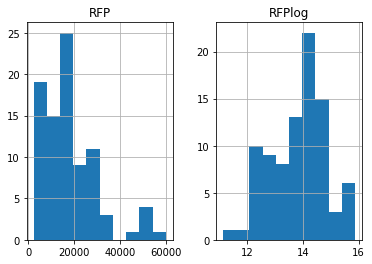

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
data['RFPlog']=np.log2(data['RFP'])
data.hist()

In [168]:
from functools import reduce
DNAortho = ('A','1000') , ('T','0100') ,  ('G','0010'), ('C','0001')
data['DNASeqOrtho']=reduce(lambda a, kv: a.str.replace(*kv), DNAortho, data['DNASeq'])
data['DNASeqOrtho']

0     0100000101000001000101000001100001000100010000...
1     0001010001001000001000010010010000100100010000...
2     1000010001000100000101000010000100101000010000...
3     0100010000101000000100010001010010000100000101...
4     0010010000100100000100010100010001001000100000...
5     0010010000100100100001000001000101000010100010...
6     0010010001001000001001000100010001000100010001...
7     0100010001001000001001000100010000010100010000...
8     0100001001001000001000100100010000101000010001...
9     0100010001000100010000100100010001000100010001...
10    1000001001000100000100100001100010000001001000...
11    0100001001000010010010000001000100010001100000...
12    0001000100100100010000011000001001000100010001...
13    0100100001000100100000100100010001001000001010...
14    0001001000100001100001001000010000101000010001...
15    0001001001000100000101000100001000100100001000...
16    0010001001001000001001000010001001001000001010...
17    100001000010100001001000000100100010010000

In [223]:
X=Variable(torch.Tensor(data['DNASeqOrtho'].apply(lambda x: float(x.find('10'))).reshape(-1,1))).cuda()
y=Variable(torch.Tensor(data['RFPlog'].reshape(-1,1))).cuda()
X, y
#int(data['DNASeqOrtho'].sum(),2)
#data['DNASeqOrtho'].apply(lambda x: x.find('1'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


(Variable containing:
     1
     3
     0
     1
     2
     2
     2
     1
     1
     1
     0
     1
     3
     1
     3
     3
     2
     0
     0
     1
     1
     3
     1
     1
     1
     1
     2
     2
     1
     3
     0
     2
     2
     0
     2
     1
     1
     2
     0
     0
     0
     0
     4
     3
     1
     0
     1
     2
     4
     0
     3
     2
     1
     2
     1
     2
     4
     1
     0
     2
     0
     1
     3
     0
     3
     1
     2
     0
     2
     1
     2
     2
     1
     1
     3
     0
     0
     1
     1
     2
     2
     2
     0
     3
     1
     1
     2
     2
 [torch.cuda.FloatTensor of size 88x1 (GPU 0)], Variable containing:
  11.1331
  11.9211
  12.2450
  12.3418
  12.3451
  12.4351
  12.4486
  12.4790
  12.5066
  12.5150
  12.5404
  12.5454
  12.5767
  12.6186
  12.7230
  12.7995
  12.8715
  12.8746
  12.9125
  12.9751
  13.0016
  13.0480
  13.0497
  13.1307
  13.2258
  13.2622
  13.3320
  13.4341
  13.4668
  1

In [202]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim,bias=True).cuda()
    def forward(self, x):
        out = self.linear(x)
        return out

In [205]:
input_dim = 1
output_dim = 1
l_rate = 0.01
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

In [224]:
epochs = 100
for epoch in range(epochs):
    epoch +=1
    optimiser.zero_grad()
    outputs = model.forward(X)
    loss = criterion(outputs, y)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.9257887005805969
epoch 2, loss 0.9257875084877014
epoch 3, loss 0.9257866144180298
epoch 4, loss 0.9257857799530029
epoch 5, loss 0.9257850646972656
epoch 6, loss 0.9257843494415283
epoch 7, loss 0.9257836937904358
epoch 8, loss 0.9257831573486328
epoch 9, loss 0.9257826209068298
epoch 10, loss 0.9257820248603821
epoch 11, loss 0.925781786441803
epoch 12, loss 0.92578125
epoch 13, loss 0.9257808923721313
epoch 14, loss 0.9257804751396179
epoch 15, loss 0.9257801175117493
epoch 16, loss 0.9257797002792358
epoch 17, loss 0.9257793426513672
epoch 18, loss 0.9257791638374329
epoch 19, loss 0.9257788062095642
epoch 20, loss 0.9257785677909851
epoch 21, loss 0.9257782101631165
epoch 22, loss 0.9257779717445374
epoch 23, loss 0.9257776141166687
epoch 24, loss 0.9257774353027344
epoch 25, loss 0.9257770776748657
epoch 26, loss 0.925777018070221
epoch 27, loss 0.9257765412330627
epoch 28, loss 0.9257764220237732
epoch 29, loss 0.9257761240005493
epoch 30, loss 0.925775945186615


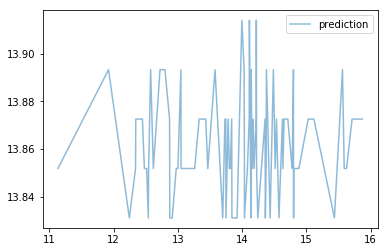

OrderedDict([('linear.weight', 
1.00000e-02 *
  2.0709
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]
), ('linear.bias', 
 13.8311
[torch.cuda.FloatTensor of size 1 (GPU 0)]
)])


In [225]:
predicted =model.forward(X).cpu().data.numpy()
#plt.plot(X, y, 'i', label = 'from data', alpha = .5)
plt.plot(y.cpu().data.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

In [21]:
#http://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html#sphx-glr-beginner-blitz-data-parallel-tutorial-py
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
input_size = 5
output_size = 2
batch_size = 30
data_size = 100

In [22]:
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, 100),
                         batch_size=batch_size, shuffle=True)

In [23]:
class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("  In Model: input size", input.size(),
              "output size", output.size())
        return output

In [24]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

if torch.cuda.is_available():
   model.cuda()

Let's use 2 GPUs!


In [25]:
for data in rand_loader:
    if torch.cuda.is_available():
        input_var = Variable(data.cuda())
    else:
        input_var = Variable(data)

    output = model(input_var)
    print("Outside: input size", input_var.size(),
          "output_size", output.size())

  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
  In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])


In [9]:
#https://www.youtube.com/watch?time_continue=96&v=vMZ7tK-RYYc
import numpy as np
import time

from numba import vectorize, cuda

#@vectorize(['float32(float32,float32)'],target='cuda')
def subVector(ε,σ):
    return ε + σ

Elements=10000
A=np.ones(Elements,dtype=np.float32)
B=np.ones(Elements,dtype=np.float32)
C=subVector(A,B)
ts=time.time()
te=time.time()
print(C,te-ts)

ModuleNotFoundError: No module named 'numba'

In [ ]:
import pyro
from pyro.distributions import Normal
from pyro.infer import SVI
from pyro.optim import Adam